In [151]:
# Load the CSV file and preview the first 10 rows

import pandas as pd

df_test = pd.read_csv("flights_2020.csv", header=None, nrows=10)
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,08:45:00,24.0,14:10:00,8.0,0,NaN,171.0,1521
1,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,05:50:00,2.0,11:10:00,0.0,0,NaN,172.0,1521
2,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,13:55:00,NaN,19:30:00,NaN,1,B,NaN,1521
3,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,16:40:00,NaN,22:05:00,NaN,1,B,NaN,1521
4,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,07:40:00,0.0,13:05:00,0.0,0,NaN,181.0,1521
5,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,19:05:00,NaN,02:05:00,NaN,1,B,NaN,1521
6,2020,1,17,5,WN,Las Vegas,NV,Milwaukee,WI,19:20:00,1.0,03:05:00,34.0,0,NaN,210.0,1524
7,2020,1,17,5,WN,Las Vegas,NV,Milwaukee,WI,09:20:00,13.0,14:45:00,5.0,0,NaN,174.0,1524
8,2020,1,17,5,WN,Las Vegas,NV,Milwaukee,WI,15:25:00,5.0,20:50:00,8.0,0,NaN,194.0,1524
9,2020,1,17,5,WN,Las Vegas,NV,New Orleans,LA,13:20:00,12.0,18:40:00,0.0,0,NaN,170.0,1500


In [154]:
# Column names from the raw flights CSV.

colnames = [
    "YEAR","MONTH","DAY","AIRLINE","AIRLINE_NO",
    "ORIGIN_CITY","ORIGIN_STATE",
    "DEST_CITY","DEST_STATE",
    "DEP_TIME","DEP_DELAY",
    "ARR_TIME","ARR_DELAY",
    "X1","X2","X3","X4"
]

print(colnames)

['YEAR', 'MONTH', 'DAY', 'AIRLINE', 'AIRLINE_NO', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DEST_CITY', 'DEST_STATE', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'X1', 'X2', 'X3', 'X4']


In [155]:
# This function loads one yearly flight CSV file, assigns our predefined column names, and keeps only the four columns needed for seasonal delay analysis:
# (YEAR, MONTH,departure delay, and arrival delay). This reduces memory use since the dataset is huge.

def load_year(path):
      return pd.read_csv(path, header=None, names=colnames, usecols=["YEAR","MONTH","DEP_DELAY","ARR_DELAY"])

In [156]:
# Load the cleaned 2020 subset using our helper function
df_test = load_year("flights_2020.csv")

# Display the first few rows to confirm the data loaded correctly
df_test.head()

,YEAR,MONTH,DEP_DELAY,ARR_DELAY
0,2020,1,24.0,8.0
1,2020,1,2.0,0.0
2,2020,1,NaN,NaN
3,2020,1,NaN,NaN
4,2020,1,0.0,0.0


In [112]:
# Finding missing values 

print("\nMissing Values (before cleaning):")
print(df_test.isnull().sum())


Missing Values (before cleaning):
YEAR              0
MONTH             0
DEP_DELAY    276161
ARR_DELAY    284362
dtype: int64


In [157]:
# Count and display the total number of rows (flights) in the 2020 dataset

row_count = len(df_test)
row_count

4316997

In [158]:
# Create a boolean mask for rows with missing values
missing_values_mask = df_test.isnull().any(axis=1)

In [159]:
# Use the mask to filter the DataFrame and show rows with missing values
rows_with_missing_values = df_test[missing_values_mask]

In [160]:
# Display the rows with missing values
print("Rows with Missing Values:")
rows_with_missing_values

Rows with Missing Values:


,YEAR,MONTH,DEP_DELAY,ARR_DELAY
2,2020,1,NaN,NaN
3,2020,1,NaN,NaN
5,2020,1,NaN,NaN
31,2020,1,NaN,NaN
100,2020,1,NaN,NaN
...,...,...,...,...
4315925,2020,11,NaN,NaN
4316598,2020,11,169.0,NaN
4316624,2020,11,8.0,NaN
4316711,2020,11,0.0,NaN


In [161]:
# Assuming the DataFrame is called 'df'

# Calculate the median for each column
median_dep_delay = df_test['DEP_DELAY'].median()
median_arr_delay = df_test['ARR_DELAY'].median()

# Fill the missing values (NaN) with the calculated medians
df_test['DEP_DELAY'].fillna(median_dep_delay, inplace=True)
df_test['ARR_DELAY'].fillna(median_arr_delay, inplace=True)

print("--- Data after Median Imputation ---")
print(df_test[['DEP_DELAY', 'ARR_DELAY']].head())
print(df_test.isnull().sum())

--- Data after Median Imputation ---
   DEP_DELAY  ARR_DELAY
0       24.0        8.0
1        2.0        0.0
2        0.0        0.0
3        0.0        0.0
4        0.0        0.0
YEAR         0
MONTH        0
DEP_DELAY    0
ARR_DELAY    0
dtype: int64


In [162]:
# Recheck if missing values have been removed

print("\nMissing Values (after cleaning):")
print(df_test.isnull().sum())


Missing Values (after cleaning):
YEAR         0
MONTH        0
DEP_DELAY    0
ARR_DELAY    0
dtype: int64


In [163]:
!pip install plotly

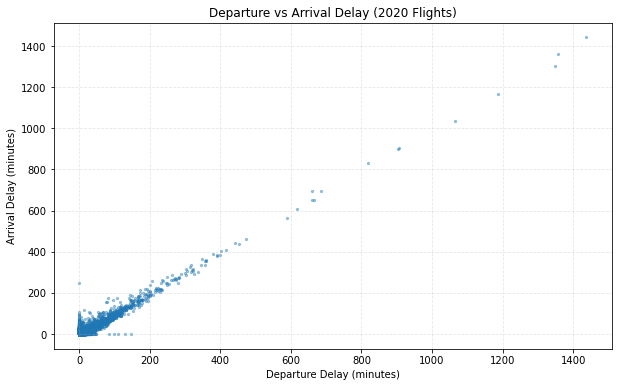

In [164]:
import matplotlib.pyplot as plt

# Took a small random sample (20,000 flights) so the scatter plot is fast to render
# This plot helps us explore the relationship between departure delay and arrival delay
# and check for correlation or extreme outliers before making final visuals.

sample = df_test.sample(20000, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(
    sample["DEP_DELAY"],
    sample["ARR_DELAY"],
    s=5,
    alpha=0.4
)

plt.title("Departure vs Arrival Delay (2020 Flights)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

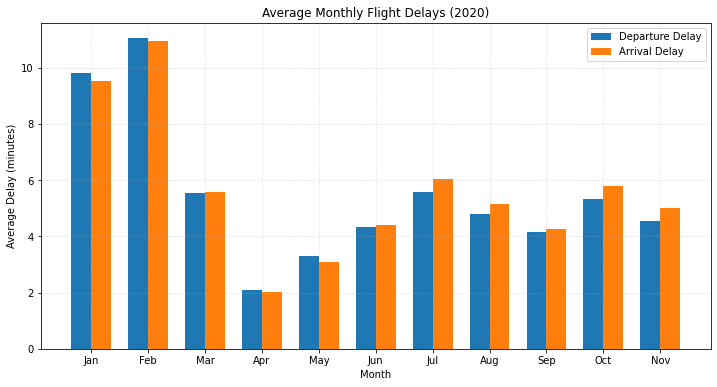

In [165]:
# Graph 1 - Vertical Bar Chart:

# We grouped the cleaned 2020 flights dataset by month and computed mean departure/arrival delays.
# This gave us one average DEP_DELAY and ARR_DELAY value per month.

monthly = (
    df_test.groupby("MONTH")[["DEP_DELAY", "ARR_DELAY"]]
           .mean()
           .sort_index()
)

import numpy as np


x = np.arange(len(monthly))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, monthly["DEP_DELAY"], width, label="Departure Delay")
plt.bar(x + width/2, monthly["ARR_DELAY"], width, label="Arrival Delay")

plt.title("Average Monthly Flight Delays (2020)")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")


month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(x, month_labels[:len(monthly)])

plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

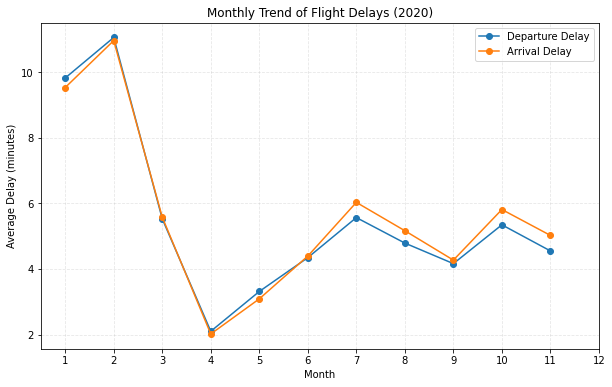

In [166]:
# Graph 2 - Line Chart

monthly = (
    df_test.groupby("MONTH")[["DEP_DELAY","ARR_DELAY"]]
           .mean()
           .sort_index()
)

# Plot a simple line chart to explore month-to-month trends.
# This helped us see the overall seasonal rise/fall pattern and check
# whether DEP_DELAY and ARR_DELAY move together across the year.

plt.figure(figsize=(10,6))
plt.plot(monthly.index, monthly["DEP_DELAY"], marker='o', label="Departure Delay")
plt.plot(monthly.index, monthly["ARR_DELAY"], marker='o', label="Arrival Delay")

plt.title("Monthly Trend of Flight Delays (2020)")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1,13))
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.show()


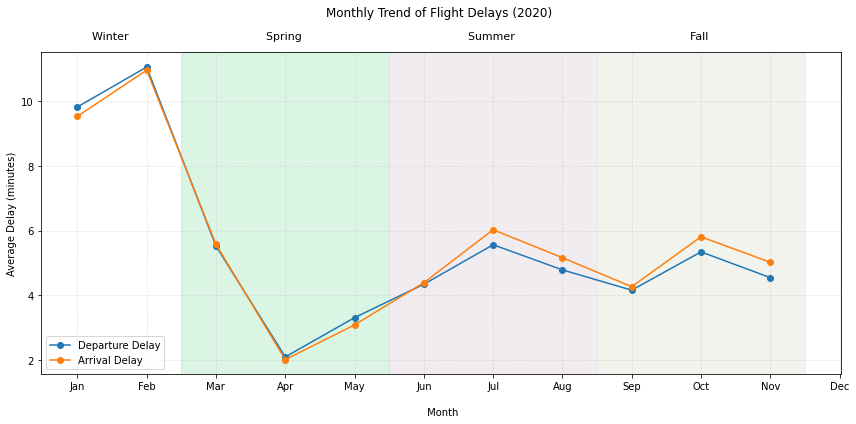

In [167]:
# Added seasons to the graph for better visualisation and understanding

monthly = (
    df_test.groupby("MONTH")[["DEP_DELAY", "ARR_DELAY"]]
           .mean()
           .sort_index()
)

# --- Plot setup ---
plt.figure(figsize=(12, 6))

# Seasonal bands (y-axis spans whole chart)
# Winter: Dec - Feb
plt.axvspan(12-0.5, 2+0.5, color="lightblue", alpha=0.20)
# Spring: Mar - May
plt.axvspan(3-0.5, 5+0.5, color="lightgreen", alpha=0.20)
# Summer: Jun - Aug
plt.axvspan(6-0.5, 8+0.5, color="pink", alpha=0.20)
# Fall: Sep - Nov
plt.axvspan(9-0.5, 11+0.5, color="moccasin", alpha=0.20)

# --- Main lines ---
plt.plot(monthly.index, monthly["DEP_DELAY"], marker='o', label="Departure Delay")
plt.plot(monthly.index, monthly["ARR_DELAY"], marker='o', label="Arrival Delay")

plt.title("Monthly Trend of Flight Delays (2020) \n\n")
plt.xlabel("\n Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1, 13), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# --- Season Labels ---
plt.text(1.5, max(monthly.max())+0.5, "Winter \n", ha="center", fontsize=11)
plt.text(4,   max(monthly.max())+0.5, "Spring \n", ha="center", fontsize=11)
plt.text(7,   max(monthly.max())+0.5, "Summer \n", ha="center", fontsize=11)
plt.text(10,  max(monthly.max())+0.5, "Fall \n", ha="center", fontsize=11)

plt.tight_layout()
plt.show()


In [169]:
## ======== FINAL GRAPH ===========

monthly = (
    df_test.groupby("MONTH")[["DEP_DELAY", "ARR_DELAY"]]
           .mean()
           .sort_index()
           .reset_index()
)

month_labels = ["Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov","Dec"]

# Built interactive figure
fig = go.Figure()

# Departure line (solid + circle)
fig.add_trace(
    go.Scatter(
        x=monthly["MONTH"],
        y=monthly["DEP_DELAY"],
        mode="lines+markers",
        name="Departure Delay",
        line=dict(width=3, dash="solid"),
        marker=dict(symbol="circle", size=7),
        hovertemplate="Month: %{x}<br>Dep delay: %{y:.2f} min<extra></extra>"
    )
)

# Arrival line (dashed + square)
fig.add_trace(
    go.Scatter(
        x=monthly["MONTH"],
        y=monthly["ARR_DELAY"],
        mode="lines+markers",
        name="Arrival Delay",
        line=dict(width=3, dash="dash"),
        marker=dict(symbol="square", size=7),
        hovertemplate="Month: %{x}<br>Arr delay: %{y:.2f} min<extra></extra>"
    )
)

max_delay = float(max(monthly["DEP_DELAY"].max(), monthly["ARR_DELAY"].max()))

# Seasonal vertical bands (proper ranges)
# Winter: Dec + Jan–Feb (split cleanly)
fig.add_vrect(x0=11.5, x1=12.5,
              fillcolor="lightblue", opacity=0.12, line_width=0, layer="below")
fig.add_vrect(x0=0.5, x1=2.5,
              fillcolor="lightblue", opacity=0.12, line_width=0, layer="below")

# Spring
fig.add_vrect(x0=2.5, x1=5.5,
              fillcolor="lightgreen", opacity=0.12, line_width=0, layer="below")

# Summer
fig.add_vrect(x0=5.5, x1=8.5,
              fillcolor="mistyrose", opacity=0.12, line_width=0, layer="below")

# Fall
fig.add_vrect(x0=8.5, x1=11.5,
              fillcolor="moccasin", opacity=0.12, line_width=0, layer="below")

# 4. Season labels
fig.add_annotation(x=1.5,  y=max_delay+0.4, text="Winter", showarrow=False)
fig.add_annotation(x=4,    y=max_delay+0.4, text="Spring", showarrow=False)
fig.add_annotation(x=7,    y=max_delay+0.4, text="Summer", showarrow=False)
fig.add_annotation(x=10,   y=max_delay+0.4, text="Fall",   showarrow=False)

# Layout & axes
fig.update_layout(
    title="Monthly Trend of Flight Delays (2020)",
    xaxis_title="Month",
    yaxis_title="Average Delay (minutes)",
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=month_labels
    ),
    yaxis=dict(range=[0, max_delay + 1]),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    hovermode="x unified",
    height=600
)

fig.show()
